In [4]:
import os
import sys
from typing import List, Dict, Tuple

email = "test@test.xyz"
query_str = "Psoriasis"

In [14]:
# Get MeSH terms
from phenox.mesh_lookup import MeshSearcher

mesh = MeshSearcher()
mesh_entry = mesh.lookup(query_str)
mesh_term = mesh_entry['name']
mesh_children = [mesh.mesh[c]['name'] for c in mesh_entry['children']]

print('Closest MeSH term:')
print(mesh_entry['ids'])
print(mesh_term)
print('Children: %s' % ', '.join(mesh_children))

Closest MeSH term:
['C17.800.859.675']
Psoriasis
Children: Arthritis, Psoriatic


In [15]:
# Get GEO datasets
from phenox.geo_data import GEOQuery

geo = GEOQuery(email=email)
pubmed_ids, gene_freq, gene_dict = geo.get_all_geo_data(mesh_term)

print('Related PubMed IDs: %s' % ', '.join(pubmed_ids))

100%|██████████| 1753/1753 [00:00<00:00, 357374.11it/s]


Related PubMed IDs: 24646743, 22479649, 25129481, 25129481, 23633458, 23685457, 24391825, 23771123, 22277938, 22348003, 21483750, 22479649, 27667537, 23407402, 21388663, 22908096, 22677045, 20829794, 21903671, 23077588, 22752307, 19036130, 20688981, 21483750, 20200541, 19718476, 18648529, 19052557, 18025162, 18716044, 17932945, 17928125, 17611229, 17277128, 16858420, 17020965, 17947518, 17003495, 16885358, 16618722, 16505361, 17075716, 15992546, 11121445


100%|██████████| 44/44 [00:24<00:00,  1.78it/s]


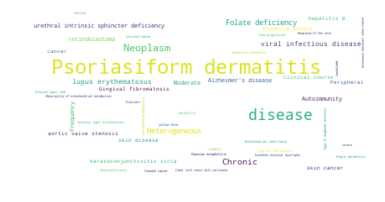

In [17]:
# Fetch and annotate PubMed abstracts
from phenox.pubmed import Pubmed
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pubmed = Pubmed(email, pubmed_ids)
term_freq = pubmed.get_term_frequencies()

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate_from_frequencies(term_freq)

# lower max_font_size
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
# Create a hierarchical dendrogram
